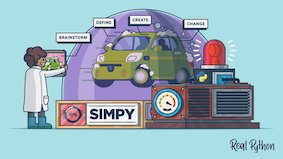

## Herleitung der Bewegungsgleichung nach Newton:
### Freischnitt der Pendelmasse:

$F_\mathrm{rad}$
wird hier nicht weiter betrachtet, da sie lediglich die Belastung auf den Faden darstellt.


$F_\mathrm{tan}$ (wird im Folgenden als $F_\mathrm{r}$ bezeichnet, da sie Rückstellkraft beschreibt.)


Die Gewichtskraft $F_\mathrm{g}$ wirkt aufgrund der Gravitation auf die Pendelmasse.

### Zerlegung der Gewichtkraft in die tangentiale Komponente:

$ F_\mathrm{tan} = - F_\mathrm{g} \cdot \sin (\theta) = - mg \cdot \sin (\theta) $

### Die Bewegungsgleichung nach dem 2. Newtonschen Gesetz:

$ F_\mathrm{tan} = m \cdot a_\mathrm{tan} $

Die Tangentialbeschleunigung ist dabei von der Pendellänge $l$ und der Winkelbeschleunigung $\ddot{\theta}(t)$ abhängig:

$ a_\mathrm{tan} = l \cdot \ddot{\theta} $

Daraus ergibt sich eine nichtlineare Differentialgleichung zweiter Ordnung:

$ m \cdot l \cdot \ddot{\theta} = - mg \cdot \sin (\theta) $ 

$ l \cdot \ddot{\theta} = - g \cdot \sin (\theta) $

$ \ddot{\theta} = - \frac{g}{l} \cdot \sin (\theta) $

$ \ddot{\theta} + \frac{g}{l} \cdot \sin (\theta) = 0 $

### Zerlegung der Differentialgleichung 2. Ordnung

mithilfe der Winkelgeschwindigkeit $\omega$ lässt sich das System in zwei gekoppelte DGL 1. Ordnung vereinfachen:

1. $ \omega = \ddot{\theta} $


2. $ \dot{\omega} = - \frac {g}{l} \cdot \sin \theta $ 

In [43]:
from sympy import Symbol, symbols, Function, lambdify, sin, cos, diff, simplify, solve

## Auslenkwinkel $\theta(t)$

Anders als bis hierhin dargestellt, ist $\theta$ eine Funktion der Zeit $t$:

In [2]:
t = Symbol('t')
theta = Function('theta')(t)
display(theta)

theta(t)

## Winkelgeschwindigkeit $\dot{\theta}(t)$

In [3]:
theta_d = diff(theta,t)  
display(theta_d)
print(type(theta_d))

Derivative(theta(t), t)

<class 'sympy.core.function.Derivative'>


## Winkelbeschleunigung $\ddot{\theta}(t)$

In [4]:
# theta_dd = diff(theta_d,t)
theta_dd = diff(theta,t,t)  
display(theta_dd)

Derivative(theta(t), (t, 2))

## Pendelmasse $m$

In [5]:
m = Symbol('m')
display(m)

m

Die Position der Pendelmasse wird in der Ebene über $x$ und $y$ angegeben.

Diese müssen somit Funktionen von $\theta$ sein.

In [6]:
x, y = symbols('x y', cls=Function)
x, y = x(theta), y(theta)
display(x,y)

x(theta(t))

y(theta(t))

$ x = \cos(\theta)$ and $y=\sin(\theta) $

why??

In [56]:
x = cos(theta)
y = sin(theta)
display(x,y)

x_f = lambdify(theta, x)
y_f = lambdify(theta, y)

display(x_f, y_f)
print(type(x_f))

cos(theta(t))

sin(theta(t))

<function _lambdifygenerated(_Dummy_48)>

<function _lambdifygenerated(_Dummy_49)>

<class 'function'>


## Define $T$, $V$, and $L$

In [13]:
g = Symbol('g')
display(g)

g

### Kinetische Energie $T$

In [14]:
T = 1/2 * m * (diff(x,t)**2 + diff(y,t)**2)
display(T)

0.5*m*(sin(theta(t))**2*Derivative(theta(t), t)**2 + cos(theta(t))**2*Derivative(theta(t), t)**2)

In [23]:
T = T.simplify()
display(T)

0.5*m*Derivative(theta(t), t)**2

### Pot. Energie $V$

In [15]:
V = m*g*y
display(V)

g*m*sin(theta(t))

### Lagrange $L$

In [16]:
L = T-V
display(L)

-g*m*sin(theta(t)) + 0.5*m*(sin(theta(t))**2*Derivative(theta(t), t)**2 + cos(theta(t))**2*Derivative(theta(t), t)**2)

In [24]:
L = L.simplify()
display(L)

m*(-g*sin(theta(t)) + 0.5*Derivative(theta(t), t)**2)

Compute $\frac{dL}{d\theta} - \frac{d}{dt} \frac{dL}{d\dot{\theta}}$ (which is equal to zero:Lagranges equation)

In [25]:
# LegrangeEquation
LE = diff(L, theta) - diff(diff(L, theta_d), t)
LE = LE.simplify()
display(LE)

-1.0*m*(g*cos(theta(t)) + Derivative(theta(t), (t, 2)))

Solve for $d^2 \theta / dt^2 $ so we can solve it with an ODE solver. Our system of equations will then be
$ \frac{d \theta}{dt} = \omega $
$ \frac{d \omega}{dt} = \frac{d^2 \theta}{dt^2} =  \text{whatever is returned} $

In [30]:
deriv_2 = solve(LE, theta_dd)[0]
print(type(deriv_2))
deriv_1 = theta_d

<class 'sympy.core.mul.Mul'>


In [31]:
display(deriv_2)

-g*cos(theta(t))

Convert this into a numpy expression:

In [37]:
deriv2_f = lambdify((g, theta, theta_d), deriv_2)
deriv1_f = lambdify(theta_d, theta_d)

display(deriv2_f)
display(deriv1_f)

print(type(deriv2_f))

<function _lambdifygenerated(g, _Dummy_42, _Dummy_41)>

<function _lambdifygenerated(_Dummy_43)>

<class 'function'>


Create ODE

In [38]:
def dSdt(S, t):
    return [
        deriv1_f(S[1]), #dtheta/dt
        deriv2_f(g, S[0], S[1]) #domega/dt
    ]

print(type(dSdt))

<class 'function'>


In [44]:
import numpy as np
from scipy.integrate import odeint

t = np.linspace(0, 20, 1000)
g = 9.81
ans1 = odeint(dSdt, y0=[np.pi/4, 0], t=t)

print(type(ans1))
print(ans1.shape)
display(ans1)

<class 'numpy.ndarray'>
(1000, 2)


array([[ 0.78539816,  0.        ],
       [ 0.78400772, -0.13893757],
       [ 0.77983252, -0.27826069],
       ...,
       [-3.92239571,  0.25279145],
       [-3.91593568,  0.3927147 ],
       [-3.9066642 ,  0.53371712]])

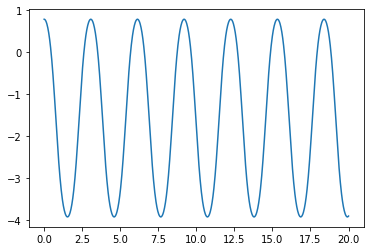

In [57]:
import matplotlib.pyplot as plt
plt.plot(t,ans1.T[0])
#plt.plot(t,ans1.T[1])

In [51]:
def get_xy(theta):
    return x_f(theta), y_f(theta)

x1, y1 = get_xy(ans1.T[0])

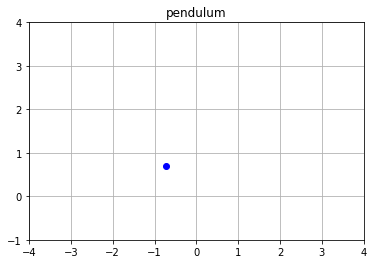

In [53]:
from matplotlib import animation
from matplotlib.animation import PillowWriter

def animate(i):
    ln1.set_data([x1[i]], [y1[i]])
    
fig, ax = plt.subplots(1,1)
ax.grid()
ln1, = plt.plot([], [], 'bo')
ax.set_ylim(-1, 4)
ax.set_xlim(-4,4)
ax.set_title("pendulum")


ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('pendulum.gif',writer='pillow',fps=50)